In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, Markdown

In [2]:
df_tmdb = pd.read_csv('data/tmdb_popular.csv')
date_col = None
for c in ['first_air_date','release_date','date','air_date']:
    if c in df_tmdb.columns:
        date_col = c
    break

In [3]:
pop_col = 'popularity' if 'popularity' in df_tmdb.columns else None

df_tmdb[date_col] = pd.to_datetime(df_tmdb[date_col], errors='coerce')
df_tmdb = df_tmdb.dropna(subset=[date_col])
df_tmdb['year'] = df_tmdb[date_col].dt.year


# Agregação por ano (média e mediana de popularidade)
agg_year = df_tmdb.groupby('year', as_index=True).agg({pop_col:['mean','median','count']})
agg_year.columns = ['pop_mean','pop_median','count']
agg_year = agg_year[agg_year['count']>10] # filtrar anos com poucos registros

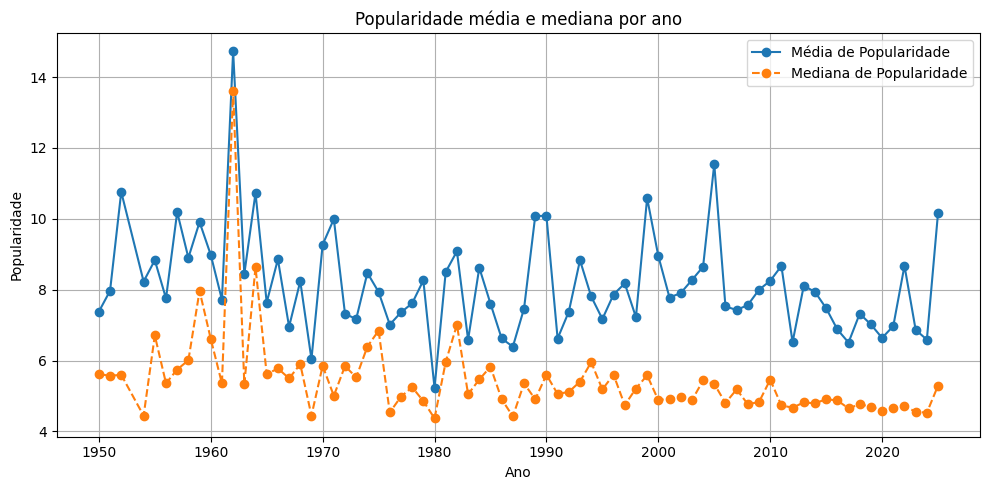

O gráfico de linha apresenta a variação da popularidade média das séries de TV ao longo dos anos. 

Essa análise permite identificar tendências de crescimento e queda de interesse do público em diferentes períodos, refletindo o impacto de plataformas de streaming, lançamentos de grandes produções e mudanças nas preferências culturais do público televisivo.

In [4]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(agg_year.index, agg_year['pop_mean'], marker='o', label='Média de Popularidade')
ax.plot(agg_year.index, agg_year['pop_median'], marker='o', linestyle='--', label='Mediana de Popularidade')
ax.set_title('Popularidade média e mediana por ano')
ax.set_xlabel('Ano')
ax.set_ylabel('Popularidade')
ax.legend()
plt.grid(True)
plt.tight_layout()

plt.show()

display(Markdown("O gráfico de linha apresenta a variação da popularidade média das séries de TV ao longo dos anos. "))
display(Markdown("Essa análise permite identificar tendências de crescimento e queda de interesse do público em diferentes períodos, refletindo o impacto de plataformas de streaming, lançamentos de grandes produções e mudanças nas preferências culturais do público televisivo."))